In [2]:
import os
import cv2 as cv
import numpy as np
from ultralytics import YOLO


In [27]:
# Load YOLO model (update path if necessary)
model = YOLO('best_osmu-e.pt')


image_folder = 'Dataset/test/images'
output_folder = 'Dataset/yolo_masks'

# Desired output image size (e.g., width=640, height=480)
output_size = (640, 480)

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through all files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        image_path = os.path.join(image_folder, filename)
        
        # Make predictions on the image
        results = model.predict(image_path)
        
        # Process each result
        for result in results:
            # Check if the result contains masks
            if hasattr(result, 'masks') and result.masks is not None:
                masks = result.masks
                mask_array = masks.data.cpu().numpy()  # Convert to NumPy array

                # Create a blank mask to accumulate all masks
                combined_mask = np.zeros((mask_array.shape[1], mask_array.shape[2]), dtype=np.uint8)

                # Loop through each mask and accumulate
                for i in range(mask_array.shape[0]):
                    mask = mask_array[i]
                    combined_mask[mask > 0] = 255  # Set mask pixels to white

                # Resize the combined mask to the desired size
                combined_mask_resized = cv.resize(combined_mask, output_size)

                # Save the resized combined mask as an imageA
                mask_filename = os.path.splitext(filename)[0] + '.png'
                mask_path = os.path.join(output_folder, mask_filename)
                cv.imwrite(mask_path, combined_mask_resized)  # Save the mask image

                print(f"Saved mask for {filename} at {mask_path}")
            else:
                print(f"No masks found for {filename}")



image 1/1 c:\Users\thami\Desktop\final-github-code\Dataset\test\images\00a47f4.png: 448x640 63 Clouds, 1431.6ms
Speed: 11.4ms preprocess, 1431.6ms inference, 100.7ms postprocess per image at shape (1, 3, 448, 640)
Saved mask for 00a47f4.png at Dataset/yolo_masks\00a47f4.png

image 1/1 c:\Users\thami\Desktop\final-github-code\Dataset\test\images\00a7177.png: 448x640 65 Clouds, 1223.6ms
Speed: 5.1ms preprocess, 1223.6ms inference, 62.0ms postprocess per image at shape (1, 3, 448, 640)
Saved mask for 00a7177.png at Dataset/yolo_masks\00a7177.png

image 1/1 c:\Users\thami\Desktop\final-github-code\Dataset\test\images\00af77b.png: 448x640 96 Clouds, 1048.9ms
Speed: 3.0ms preprocess, 1048.9ms inference, 63.5ms postprocess per image at shape (1, 3, 448, 640)
Saved mask for 00af77b.png at Dataset/yolo_masks\00af77b.png

image 1/1 c:\Users\thami\Desktop\final-github-code\Dataset\test\images\0a9e961.png: 448x640 76 Clouds, 1334.7ms
Speed: 3.0ms preprocess, 1334.7ms inference, 65.5ms postprocess

In [18]:
source_folder = 'Dataset/Real_World_images'
destination_folder = 'Dataset/Real_World_images_mask'

output_size = (640, 480)
min_area = 0
# Create the output directory if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Process each image in the input directory
for filename in os.listdir(source_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Full path to the input image
        image_path = os.path.join(source_folder, filename)

        # Read the image
        image = cv.imread(image_path)

        # Convert to grayscale
        gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

        # Apply Gaussian Blur to reduce noise
        blurred = cv.GaussianBlur(gray, (9, 9), 0)

        # Apply Otsu's thresholding
        ret, binary_mask = cv.threshold(
            blurred, 
            0,               
            255,              
            cv.THRESH_BINARY + cv.THRESH_OTSU
        )

        num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(binary_mask)

        # Create an empty image to store the filtered clusters
        filtered_image = np.zeros_like(binary_mask)

        # Loop through each connected component and filter based on area
        for i in range(1, num_labels):  # Skipping the background label (0)
            area = stats[i, cv.CC_STAT_AREA]  # Get the area of the connected component
            if area >= min_area:
                # If the area is greater than or equal to the threshold, keep the component
                filtered_image[labels == i] = 255

        # Create the output file path
        filtered_image = cv.resize(filtered_image, output_size)  
        output_path = os.path.join(destination_folder, filename)

        # Create the output file path with .png extension
        output_filename = os.path.splitext(filename)[0] + '.png'
        output_path = os.path.join(destination_folder, output_filename)

        # Save the binary mask as PNG to the output directory
        cv.imwrite(output_path, filtered_image)

00a47f4.png | Dice Coefficient: 0.6077 | IoU: 0.4365
00a7177.png | Dice Coefficient: 0.8066 | IoU: 0.6758
00af77b.png | Dice Coefficient: 0.7303 | IoU: 0.5752
0a9e961.png | Dice Coefficient: 0.6045 | IoU: 0.4332
0b3a6a2.png | Dice Coefficient: 0.8005 | IoU: 0.6674
0b5d19e.png | Dice Coefficient: 0.7641 | IoU: 0.6183
0bae7a3.png | Dice Coefficient: 0.5546 | IoU: 0.3837
0bb7fb2.png | Dice Coefficient: 0.7857 | IoU: 0.6470
0c08fb7.png | Dice Coefficient: 0.6754 | IoU: 0.5099
0c098cf.png | Dice Coefficient: 0.5088 | IoU: 0.3412
0c61125.png | Dice Coefficient: 0.6420 | IoU: 0.4728
0c930ea.png | Dice Coefficient: 0.6478 | IoU: 0.4791
0cd6b74.png | Dice Coefficient: 0.6857 | IoU: 0.5217
0ce7b74.png | Dice Coefficient: 0.3741 | IoU: 0.2301
1187ec0.png | Dice Coefficient: 0.7371 | IoU: 0.5836
1230c60.png | Dice Coefficient: 0.7151 | IoU: 0.5566
1dc72052.png | Dice Coefficient: 0.7452 | IoU: 0.5939
1e0c814d.png | Dice Coefficient: 0.6354 | IoU: 0.4657
1e631af8.png | Dice Coefficient: 0.7395 | Io

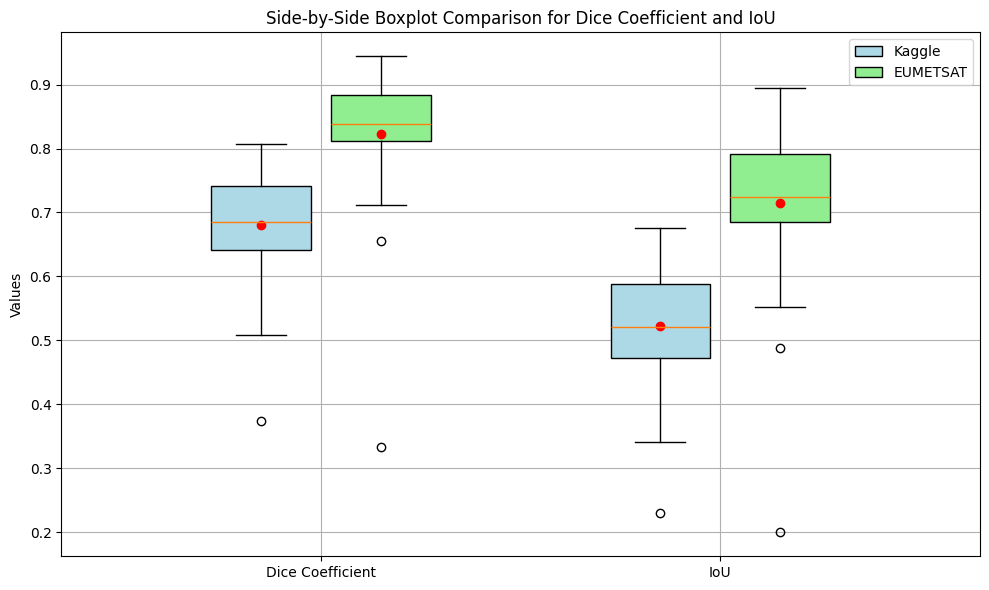

In [35]:
import matplotlib.pyplot as plt

# Define the folders
actual_mask_folder = 'Dataset/ostu/otsutest/'
predicted_mask_folder = 'Dataset/yolo_masks'
visualization_folder = 'Dataset/visualizations'

# Create visualization folder if it doesn't exist
os.makedirs(visualization_folder, exist_ok=True)

# Initialize variables to accumulate the total values
total_dice_coefficient = 0
total_iou = 0
image_count = 0  # To keep track of the number of processed images

# Lists to store Dice and IoU values for box and whisker plot
dice_list = []
iou_list = []

# Function to visualize and save the images
def visualize_bitwise_operations(filename, actual, predicted, intersection, union):
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plt.title('Actual Mask')
    plt.imshow(actual, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Predicted Mask')
    plt.imshow(predicted, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Intersection (AND)')
    plt.imshow(intersection, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title('Union (OR)')
    plt.imshow(union, cmap='gray')
    plt.axis('off')

    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(visualization_folder, f'visualization_{filename}')
    plt.savefig(save_path)
    plt.close()  # Close the figure to save memory

# Loop through all files in the actual mask folder
for filename in os.listdir(actual_mask_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        actual_mask_path = os.path.join(actual_mask_folder, filename)
        predicted_mask_path = os.path.join(predicted_mask_folder, filename)
        
        # Check if the predicted mask exists
        if os.path.exists(predicted_mask_path):
            # Read the actual and predicted mask images
            actual_mask_image = cv.imread(actual_mask_path, cv.IMREAD_GRAYSCALE)
            predicted_mask_image = cv.imread(predicted_mask_path, cv.IMREAD_GRAYSCALE)
            
            # Ensure masks are binary
            _, actual_binary = cv.threshold(actual_mask_image, 0, 1, cv.THRESH_BINARY)
            _, predicted_binary = cv.threshold(predicted_mask_image, 0, 1, cv.THRESH_BINARY)
            
            # Calculate intersection and union using bitwise operations
            intersection = cv.bitwise_and(actual_binary, predicted_binary)
            union = cv.bitwise_or(actual_binary, predicted_binary)
            
            # Calculate Dice coefficient
            actual_area = np.sum(actual_binary)
            predicted_area = np.sum(predicted_binary)
            if (actual_area + predicted_area) > 0:
                dice_coefficient = (2 * np.sum(intersection)) / (actual_area + predicted_area)
            else:
                dice_coefficient = 0.0
            
            # Calculate IoU
            union_area = np.sum(union)
            if union_area > 0:
                iou = np.sum(intersection) / union_area
            else:
                iou = 0.0
            
            # Add the dice coefficient and IoU to their respective lists
            dice_list.append(dice_coefficient)
            iou_list.append(iou)
            
            # Accumulate the values for averaging later
            total_dice_coefficient += dice_coefficient
            total_iou += iou
            image_count += 1  # Increment the image count
            
            # Print the results for each image
            print(f"{filename} | Dice Coefficient: {dice_coefficient:.4f} | IoU: {iou:.4f}")
            
            # Visualize and save the bitwise operation results
            visualize_bitwise_operations(filename, actual_binary, predicted_binary, intersection, union)
        else:
            print(f"Predicted mask for {filename} not found.")

# Calculate the averages if there were any valid images processed
if image_count > 0:
    avg_dice_coefficient = total_dice_coefficient / image_count
    avg_iou = total_iou / image_count
    
    # Print the average results
    print("\n=== AVERAGE RESULTS ===")
    print(f"Average Dice Coefficient: {avg_dice_coefficient:.4f}")
    print(f"Average IoU: {avg_iou:.4f}")
    
    # Split the first 30 values and the next 30 values for comparison
    first_25_dice = dice_list[:31]
    next_25_dice = dice_list[32:60]
    
    first_25_iou = iou_list[:31]
    next_25_iou = iou_list[31:60]

    # Calculate the averages for each group
mean_first_25_dice = np.mean(first_25_dice)
mean_next_25_dice = np.mean(next_25_dice)
mean_first_25_iou = np.mean(first_25_iou)
mean_next_25_iou = np.mean(next_25_iou)

# Create side-by-side box and whisker plots for Dice and IoU
data_to_plot = [first_25_dice, next_25_dice, first_25_iou, next_25_iou]
labels = ['Kaggle Dice Coefficent', 'EUMETSAT Dice Coefficient', 'Kaggle IoU', 'EUMETSAT IoU']

# Define positions for the boxes
positions = [1, 1.3, 2, 2.3]  # This places the dice boxes closer and the iou boxes closer

# Colors for Kaggle (left) and EUMETSAT (right)
colors = ['lightblue', 'lightgreen']

plt.figure(figsize=(10, 6))

# Plot each set of boxplots with specific colors
boxprops = dict(patch_artist=True)
bplot1 = plt.boxplot([first_25_dice], patch_artist=True, widths=0.25, positions=[1], boxprops=dict(facecolor=colors[0]))
bplot2 = plt.boxplot([next_25_dice], patch_artist=True, widths=0.25, positions=[1.3], boxprops=dict(facecolor=colors[1]))
bplot3 = plt.boxplot([first_25_iou], patch_artist=True, widths=0.25, positions=[2], boxprops=dict(facecolor=colors[0]))
bplot4 = plt.boxplot([next_25_iou], patch_artist=True, widths=0.25, positions=[2.3], boxprops=dict(facecolor=colors[1]))

# Set custom x-ticks for clearer labeling
plt.xticks([1.15, 2.15], ['Dice Coefficient', 'IoU'])

# Add a title and labels
plt.title("Side-by-Side Boxplot Comparison for Dice Coefficient and IoU")
plt.ylabel("Values")

# Plot the mean values as red dots
plt.plot([1], [mean_first_25_dice], 'ro', label=f"Kaggle Dice Mean: {mean_first_25_dice:.4f}")
plt.plot([1.3], [mean_next_25_dice], 'ro', label=f"EUMETSAT Dice Mean: {mean_next_25_dice:.4f}")
plt.plot([2], [mean_first_25_iou], 'ro', label=f"Kaggle IoU Mean: {mean_first_25_iou:.4f}")
plt.plot([2.3], [mean_next_25_iou], 'ro', label=f"EUMETSAT IoU Mean: {mean_next_25_iou:.4f}")

# Add a legend for Kaggle and EUMETSAT
plt.legend([bplot1["boxes"][0], bplot2["boxes"][0]], ['Kaggle', 'EUMETSAT'], loc='upper right')

plt.grid(True)
plt.tight_layout()

# Save the boxplot with the mean values
plt.savefig(os.path.join(visualization_folder, 'dice_iou_boxplot_comparison_with_means.png'))
plt.show()


In [12]:
# Initialize total counts for TP, TN, FP, FN
total_TP = 0
total_TN = 0
total_FP = 0
total_FN = 0

# Loop through all files in the actual mask folder
for filename in os.listdir(actual_mask_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        actual_mask_path = os.path.join(actual_mask_folder, filename)
        predicted_mask_path = os.path.join(predicted_mask_folder, filename)
        
        # Check if the predicted mask exists
        if os.path.exists(predicted_mask_path):
            # Read the actual and predicted mask images
            actual_mask_image = cv.imread(actual_mask_path, cv.IMREAD_GRAYSCALE)
            predicted_mask_image = cv.imread(predicted_mask_path, cv.IMREAD_GRAYSCALE)
            
            # Ensure masks are binary
            _, actual_binary = cv.threshold(actual_mask_image, 0, 1, cv.THRESH_BINARY)
            _, predicted_binary = cv.threshold(predicted_mask_image, 0, 1, cv.THRESH_BINARY)
            
            # Calculate intersection and union using bitwise operations
            intersection = cv.bitwise_and(actual_binary, predicted_binary)
            union = cv.bitwise_or(actual_binary, predicted_binary)
            
            # Calculate Dice coefficient
            actual_area = np.sum(actual_binary)
            predicted_area = np.sum(predicted_binary)
            if (actual_area + predicted_area) > 0:
                dice_coefficient = (2 * np.sum(intersection)) / (actual_area + predicted_area)
            else:
                dice_coefficient = 0.0
            
            # Calculate IoU
            union_area = np.sum(union)
            if union_area > 0:
                iou = np.sum(intersection) / union_area
            else:
                iou = 0.0
            
            # Add the dice coefficient and IoU to their respective lists
            dice_list.append(dice_coefficient)
            iou_list.append(iou)
            
            # Accumulate the values for averaging later
            total_dice_coefficient += dice_coefficient
            total_iou += iou
            image_count += 1  # Increment the image count
            
            # Accuracy calculation:
            TP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 1))  # True Positives
            TN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 0))  # True Negatives
            FP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 0))  # False Positives
            FN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 1))  # False Negatives
            
            # Accumulate total counts for TP, TN, FP, FN
            total_TP += TP
            total_TN += TN
            total_FP += FP
            total_FN += FN
            
            # Print the results for each image
            print(f"{filename} | Dice Coefficient: {dice_coefficient:.4f} | IoU: {iou:.4f} | Accuracy: {(TP + TN) / (TP + TN + FP + FN):.4f}")
            
            # Visualize and save the bitwise operation results
            visualize_bitwise_operations(filename, actual_binary, predicted_binary, intersection, union)
        else:
            print(f"Predicted mask for {filename} not found.")

# Calculate the averages if there were any valid images processed
if image_count > 0:
    avg_dice_coefficient = total_dice_coefficient / image_count
    avg_iou = total_iou / image_count
    overall_accuracy = (total_TP + total_TN) / (total_TP + total_TN + total_FP + total_FN)
    
    # Print the average results
    print("\n=== AVERAGE RESULTS ===")
    print(f"Average Dice Coefficient: {avg_dice_coefficient:.4f}")
    print(f"Average IoU: {avg_iou:.4f}")
    print(f"Overall Accuracy: {overall_accuracy:.4f}")


034ef1c.png | Dice Coefficient: 0.7249 | IoU: 0.5685 | Accuracy: 0.8529
11f25d7.png | Dice Coefficient: 0.8265 | IoU: 0.7044 | Accuracy: 0.9088
15b3f99.png | Dice Coefficient: 0.7521 | IoU: 0.6027 | Accuracy: 0.8248
15b9d31.png | Dice Coefficient: 0.8036 | IoU: 0.6716 | Accuracy: 0.8870
21d93a3.png | Dice Coefficient: 0.7958 | IoU: 0.6609 | Accuracy: 0.8568
39a6998.png | Dice Coefficient: 0.6568 | IoU: 0.4890 | Accuracy: 0.8672
42dca86.png | Dice Coefficient: 0.7987 | IoU: 0.6649 | Accuracy: 0.8417
518e821.png | Dice Coefficient: 0.7379 | IoU: 0.5846 | Accuracy: 0.8994
609f727.png | Dice Coefficient: 0.7545 | IoU: 0.6058 | Accuracy: 0.8915
6d91d1e.png | Dice Coefficient: 0.6804 | IoU: 0.5156 | Accuracy: 0.8920
7e325e2.png | Dice Coefficient: 0.8551 | IoU: 0.7469 | Accuracy: 0.9216
87dfdfc.png | Dice Coefficient: 0.6679 | IoU: 0.5014 | Accuracy: 0.8709
8ba3f0f.png | Dice Coefficient: 0.6481 | IoU: 0.4794 | Accuracy: 0.8942
afc07fc0.png | Dice Coefficient: 0.8104 | IoU: 0.6812 | Accuracy

In [26]:
# Initialize total counts for TP, TN, FP, FN
total_TP = 0
total_TN = 0
total_FP = 0
total_FN = 0

# Lists to store metrics for further analysis or plotting
jaccard_list = []
precision_list = []
recall_list = []
specificity_list = []
accuracy_list = []

# Loop through all files in the actual mask folder
for filename in os.listdir(actual_mask_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        actual_mask_path = os.path.join(actual_mask_folder, filename)
        predicted_mask_path = os.path.join(predicted_mask_folder, filename)
        
        # Check if the predicted mask exists
        if os.path.exists(predicted_mask_path):
            # Read the actual and predicted mask images
            actual_mask_image = cv.imread(actual_mask_path, cv.IMREAD_GRAYSCALE)
            predicted_mask_image = cv.imread(predicted_mask_path, cv.IMREAD_GRAYSCALE)
            
            # Ensure masks are binary
            _, actual_binary = cv.threshold(actual_mask_image, 0, 1, cv.THRESH_BINARY)
            _, predicted_binary = cv.threshold(predicted_mask_image, 0, 1, cv.THRESH_BINARY)
            
            # Accuracy calculation:
            TP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 1))  # True Positives
            TN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 0))  # True Negatives
            FP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 0))  # False Positives
            FN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 1))  # False Negatives
            
            # Calculate metrics
            if (TP + FN + FP) > 0:
                jaccard_index = TP / (TP + FN + FP)  # Jaccard Index
            else:
                jaccard_index = 0.0
                
            if (TP + FP) > 0:
                precision = TP / (TP + FP)  # Precision
            else:
                precision = 0.0
                
            if (TP + FN) > 0:
                recall = TP / (TP + FN)  # Recall
            else:
                recall = 0.0
                
            if (TN + FP) > 0:
                specificity = TN / (TN + FP)  # Specificity
            else:
                specificity = 0.0
                
            if (TP + TN + FP + FN) > 0:
                accuracy = (TP + TN) / (TP + TN + FP + FN)  # Overall Accuracy
            else:
                accuracy = 0.0
            
            # Append the metrics to the respective lists
            jaccard_list.append(jaccard_index)
            precision_list.append(precision)
            recall_list.append(recall)
            specificity_list.append(specificity)
            accuracy_list.append(accuracy)
            
            # Accumulate total counts for TP, TN, FP, FN
            total_TP += TP
            total_TN += TN
            total_FP += FP
            total_FN += FN
            
            # Print the results for each image
            print(f"{filename} | Jaccard Index: {jaccard_index:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | Specificity: {specificity:.4f} | Accuracy: {accuracy:.4f}")
            
            # Visualize and save the bitwise operation results (optional)
            visualize_bitwise_operations(filename, actual_binary, predicted_binary, actual_binary & predicted_binary, actual_binary | predicted_binary)
        else:
            print(f"Predicted mask for {filename} not found.")

# Calculate the overall averages if any images were processed
if image_count > 0:
    avg_jaccard = np.mean(jaccard_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_specificity = np.mean(specificity_list)
    avg_accuracy = np.mean(accuracy_list)
    
    # Print the average results
    print("\n=== AVERAGE RESULTS ===")
    print(f"Average Jaccard Index: {avg_jaccard:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average Specificity: {avg_specificity:.4f}")
    print(f"Average Accuracy: {avg_accuracy:.4f}")


00a47f4.png | Jaccard Index: 0.4365 | Precision: 0.6333 | Recall: 0.5841 | Specificity: 0.9214 | Accuracy: 0.8578
00a7177.png | Jaccard Index: 0.6758 | Precision: 0.8167 | Recall: 0.7967 | Specificity: 0.8871 | Accuracy: 0.8521
00af77b.png | Jaccard Index: 0.5752 | Precision: 0.7106 | Recall: 0.7513 | Specificity: 0.8884 | Accuracy: 0.8518
0a9e961.png | Jaccard Index: 0.4332 | Precision: 0.6688 | Recall: 0.5515 | Specificity: 0.8960 | Accuracy: 0.8010
0b3a6a2.png | Jaccard Index: 0.6674 | Precision: 0.8013 | Recall: 0.7998 | Specificity: 0.8852 | Accuracy: 0.8539
0b5d19e.png | Jaccard Index: 0.6183 | Precision: 0.7918 | Recall: 0.7383 | Specificity: 0.9465 | Accuracy: 0.9015
0bae7a3.png | Jaccard Index: 0.3837 | Precision: 0.6460 | Recall: 0.4858 | Specificity: 0.9196 | Accuracy: 0.8190
0bb7fb2.png | Jaccard Index: 0.6470 | Precision: 0.7855 | Recall: 0.7859 | Specificity: 0.8409 | Accuracy: 0.8175
0c08fb7.png | Jaccard Index: 0.5099 | Precision: 0.6640 | Recall: 0.6872 | Specificity: 

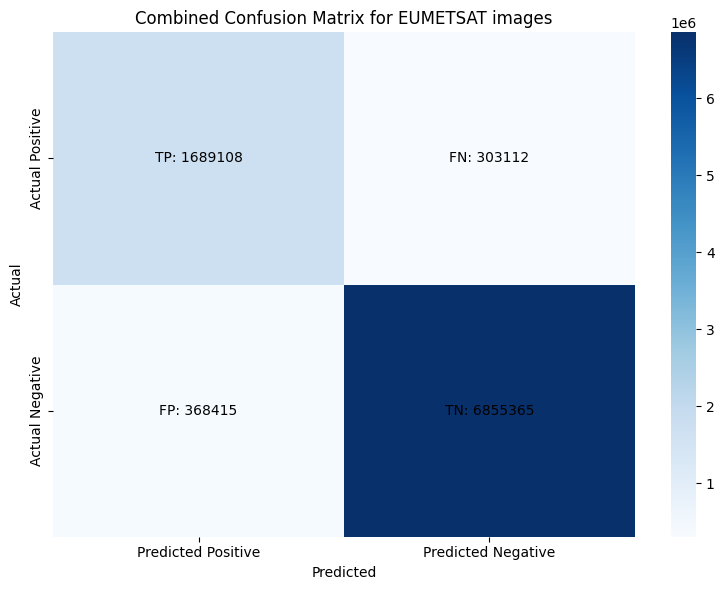

In [54]:
import os
import cv2 as cv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize total counts for TP, TN, FP, FN
total_TP = 0
total_TN = 0
total_FP = 0
total_FN = 0

actual_mask_folder = 'Dataset/ostu/otsutest/'
predicted_mask_folder = 'Dataset/yolo_masks'
visualization_folder = 'Dataset/visualizations'

# Loop through all files in the actual mask folder
for filename in os.listdir(actual_mask_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        actual_mask_path = os.path.join(actual_mask_folder, filename)
        predicted_mask_path = os.path.join(predicted_mask_folder, filename)
        
        # Check if the predicted mask exists
        if os.path.exists(predicted_mask_path):
            # Read the actual and predicted mask images
            actual_mask_image = cv.imread(actual_mask_path, cv.IMREAD_GRAYSCALE)
            predicted_mask_image = cv.imread(predicted_mask_path, cv.IMREAD_GRAYSCALE)
            
            # Ensure masks are binary
            _, actual_binary = cv.threshold(actual_mask_image, 0, 1, cv.THRESH_BINARY)
            _, predicted_binary = cv.threshold(predicted_mask_image, 0, 1, cv.THRESH_BINARY)
            
            # Calculate TP, TN, FP, FN for the current image
            TP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 1))  # True Positives
            TN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 0))  # True Negatives
            FP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 0))  # False Positives
            FN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 1))  # False Negatives
            
            # Accumulate total counts for TP, TN, FP, FN
            total_TP += TP
            total_TN += TN
            total_FP += FP
            total_FN += FN
            
            # Optional: Print metrics for each image
            # print(f"{filename} | TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
        else:
            print(f"Predicted mask for {filename} not found.")

# After processing all images, create the combined confusion matrix
confusion_matrix = np.array([[total_TP, total_FN], 
                             [total_FP, total_TN]])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))

# Create the heatmap with detailed information
sns.heatmap(confusion_matrix, annot=False, cmap="Blues",
            xticklabels=['Predicted Positive', 'Predicted Negative'],
            yticklabels=['Actual Positive', 'Actual Negative'])

# Adding titles and labels
plt.title("Combined Confusion Matrix for EUMETSAT images")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add detailed values to the heatmap in the correct slots
# Add detailed values to the heatmap in the correct slots
plt.text(0.5, 0.5, f'TP: {total_TP}', ha='center', va='center', color='black')  # TP in the first cell
plt.text(0.5, 1.5, f'FP: {total_FP}', ha='center', va='center', color='black')  # FP in the second cell
plt.text(1.5, 0.5, f'FN: {total_FN}', ha='center', va='center', color='black')  # FN in the third cell
plt.text(1.5, 1.5, f'TN: {total_TN}', ha='center', va='center', color='black')  # TN in the fourth cell


# Save the confusion matrix plot
plt.tight_layout()
plt.savefig(os.path.join(visualization_folder, 'combined_confusion_matrix.png'))
plt.show()


In [55]:
from sklearn.metrics import precision_recall_curve, auc

# List to store precision-recall AUC for each image
precision_recall_aucs = []

# Loop through all files in the actual mask folder
for filename in os.listdir(actual_mask_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image file types
        actual_mask_path = os.path.join(actual_mask_folder, filename)
        predicted_mask_path = os.path.join(predicted_mask_folder, filename)
        
        # Check if the predicted mask exists
        if os.path.exists(predicted_mask_path):
            # Read the actual and predicted mask images
            actual_mask_image = cv.imread(actual_mask_path, cv.IMREAD_GRAYSCALE)
            predicted_mask_image = cv.imread(predicted_mask_path, cv.IMREAD_GRAYSCALE)
            
            # Ensure masks are binary
            _, actual_binary = cv.threshold(actual_mask_image, 0, 1, cv.THRESH_BINARY)
            _, predicted_binary = cv.threshold(predicted_mask_image, 0, 1, cv.THRESH_BINARY)
            
            # Flatten the arrays to 1D to calculate precision-recall curve
            actual_flat = actual_binary.flatten()
            predicted_flat = predicted_binary.flatten()
            
            # Calculate precision-recall curve
            precision, recall, _ = precision_recall_curve(actual_flat, predicted_flat)
            
            # Compute the area under the precision-recall curve
            pr_auc = auc(recall, precision)
            
            # Add the AUC for this image to the list
            precision_recall_aucs.append(pr_auc)
            
            # Optionally, print the AUC for this image
            print(f"{filename} | Precision-Recall AUC: {pr_auc:.4f}")
        else:
            print(f"Predicted mask for {filename} not found.")

# Calculate mean average precision (mAP) across all images
if len(precision_recall_aucs) > 0:
    mean_average_precision = np.mean(precision_recall_aucs)
    print(f"\nMean Average Precision (mAP): {mean_average_precision:.4f}")
else:
    print("No images processed.")


00a47f4.png | Precision-Recall AUC: 0.6479
00a7177.png | Precision-Recall AUC: 0.8460
00af77b.png | Precision-Recall AUC: 0.7641
0a9e961.png | Precision-Recall AUC: 0.6720
0b3a6a2.png | Precision-Recall AUC: 0.8372
0b5d19e.png | Precision-Recall AUC: 0.7933
0bae7a3.png | Precision-Recall AUC: 0.6256
0bb7fb2.png | Precision-Recall AUC: 0.8313
0c08fb7.png | Precision-Recall AUC: 0.7143
0c098cf.png | Precision-Recall AUC: 0.5562
0c61125.png | Precision-Recall AUC: 0.6949
0c930ea.png | Precision-Recall AUC: 0.6940
0cd6b74.png | Precision-Recall AUC: 0.7260
0ce7b74.png | Precision-Recall AUC: 0.4946
1187ec0.png | Precision-Recall AUC: 0.7840
1230c60.png | Precision-Recall AUC: 0.7521
1dc72052.png | Precision-Recall AUC: 0.7805
Predicted mask for 1e0c814d.png not found.
Predicted mask for 1e631af8.png not found.
Predicted mask for 1ea14f8f.png not found.
Predicted mask for 1ebc777c.png not found.
Predicted mask for 1ee0089b.png not found.
Predicted mask for 1f06d0ee.png not found.
Predicted 

In [36]:
# Initialize total counts for TP, TN, FP, FN for both sets
total_TP_first_25 = 0
total_TN_first_25 = 0
total_FP_first_25 = 0
total_FN_first_25 = 0

total_TP_next_25 = 0
total_TN_next_25 = 0
total_FP_next_25 = 0
total_FN_next_25 = 0

# Lists to store metrics for further analysis or plotting for both sets
jaccard_list_first_25 = []
precision_list_first_25 = []
recall_list_first_25 = []
specificity_list_first_25 = []
accuracy_list_first_25 = []

jaccard_list_next_25 = []
precision_list_next_25 = []
recall_list_next_25 = []
specificity_list_next_25 = []
accuracy_list_next_25 = []

# Get list of files in the actual mask folder
file_list = [f for f in os.listdir(actual_mask_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process first 25 images
for i, filename in enumerate(file_list[:31]):
    actual_mask_path = os.path.join(actual_mask_folder, filename)
    predicted_mask_path = os.path.join(predicted_mask_folder, filename)
    
    # Ensure predicted mask exists
    if os.path.exists(predicted_mask_path):
        # Read actual and predicted mask images
        actual_mask_image = cv.imread(actual_mask_path, cv.IMREAD_GRAYSCALE)
        predicted_mask_image = cv.imread(predicted_mask_path, cv.IMREAD_GRAYSCALE)
        
        # Ensure masks are binary
        _, actual_binary = cv.threshold(actual_mask_image, 0, 1, cv.THRESH_BINARY)
        _, predicted_binary = cv.threshold(predicted_mask_image, 0, 1, cv.THRESH_BINARY)
        
        # Compute confusion matrix components
        TP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 1))
        TN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 0))
        FP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 0))
        FN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 1))
        
        # Calculate metrics
        jaccard_index = TP / (TP + FN + FP) if (TP + FN + FP) > 0 else 0.0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0.0
        
        # Append metrics to lists for first 25
        jaccard_list_first_25.append(jaccard_index)
        precision_list_first_25.append(precision)
        recall_list_first_25.append(recall)
        specificity_list_first_25.append(specificity)
        accuracy_list_first_25.append(accuracy)
        
        # Accumulate total TP, TN, FP, FN for first 25
        total_TP_first_25 += TP
        total_TN_first_25 += TN
        total_FP_first_25 += FP
        total_FN_first_25 += FN
        
        # Print per image results for first 25
        print(f"{filename} (First 25) | Jaccard Index: {jaccard_index:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | Specificity: {specificity:.4f} | Accuracy: {accuracy:.4f}")

# Process next 25 images
for i, filename in enumerate(file_list[32:61]):
    actual_mask_path = os.path.join(actual_mask_folder, filename)
    predicted_mask_path = os.path.join(predicted_mask_folder, filename)
    
    if os.path.exists(predicted_mask_path):
        actual_mask_image = cv.imread(actual_mask_path, cv.IMREAD_GRAYSCALE)
        predicted_mask_image = cv.imread(predicted_mask_path, cv.IMREAD_GRAYSCALE)
        
        _, actual_binary = cv.threshold(actual_mask_image, 0, 1, cv.THRESH_BINARY)
        _, predicted_binary = cv.threshold(predicted_mask_image, 0, 1, cv.THRESH_BINARY)
        
        TP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 1))
        TN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 0))
        FP = np.sum(np.logical_and(predicted_binary == 1, actual_binary == 0))
        FN = np.sum(np.logical_and(predicted_binary == 0, actual_binary == 1))
        
        jaccard_index = TP / (TP + FN + FP) if (TP + FN + FP) > 0 else 0.0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0.0
        
        # Append metrics to lists for next 25
        jaccard_list_next_25.append(jaccard_index)
        precision_list_next_25.append(precision)
        recall_list_next_25.append(recall)
        specificity_list_next_25.append(specificity)
        accuracy_list_next_25.append(accuracy)
        
        # Accumulate total TP, TN, FP, FN for next 25
        total_TP_next_25 += TP
        total_TN_next_25 += TN
        total_FP_next_25 += FP
        total_FN_next_25 += FN
        
        print(f"{filename} (Next 25) | Jaccard Index: {jaccard_index:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | Specificity: {specificity:.4f} | Accuracy: {accuracy:.4f}")

# Calculate the overall averages for both sets

if len(jaccard_list_first_25) > 0:
    avg_jaccard_first_25 = np.mean(jaccard_list_first_25)
    avg_precision_first_25 = np.mean(precision_list_first_25)
    avg_recall_first_25 = np.mean(recall_list_first_25)
    avg_specificity_first_25 = np.mean(specificity_list_first_25)
    avg_accuracy_first_25 = np.mean(accuracy_list_first_25)

    print("\n=== AVERAGE RESULTS FOR FIRST 25 IMAGES ===")
    print(f"Average Jaccard Index (First 25): {avg_jaccard_first_25:.4f}")
    print(f"Average Precision (First 25): {avg_precision_first_25:.4f}")
    print(f"Average Recall (First 25): {avg_recall_first_25:.4f}")
    print(f"Average Specificity (First 25): {avg_specificity_first_25:.4f}")
    print(f"Average Accuracy (First 25): {avg_accuracy_first_25:.4f}")

if len(jaccard_list_next_25) > 0:
    avg_jaccard_next_25 = np.mean(jaccard_list_next_25)
    avg_precision_next_25 = np.mean(precision_list_next_25)
    avg_recall_next_25 = np.mean(recall_list_next_25)
    avg_specificity_next_25 = np.mean(specificity_list_next_25)
    avg_accuracy_next_25 = np.mean(accuracy_list_next_25)

    print("\n=== AVERAGE RESULTS FOR NEXT 25 IMAGES ===")
    print(f"Average Jaccard Index (Next 25): {avg_jaccard_next_25:.4f}")
    print(f"Average Precision (Next 25): {avg_precision_next_25:.4f}")
    print(f"Average Recall (Next 25): {avg_recall_next_25:.4f}")
    print(f"Average Specificity (Next 25): {avg_specificity_next_25:.4f}")
    print(f"Average Accuracy (Next 25): {avg_accuracy_next_25:.4f}")


00a47f4.png (First 25) | Jaccard Index: 0.4365 | Precision: 0.6333 | Recall: 0.5841 | Specificity: 0.9214 | Accuracy: 0.8578
00a7177.png (First 25) | Jaccard Index: 0.6758 | Precision: 0.8167 | Recall: 0.7967 | Specificity: 0.8871 | Accuracy: 0.8521
00af77b.png (First 25) | Jaccard Index: 0.5752 | Precision: 0.7106 | Recall: 0.7513 | Specificity: 0.8884 | Accuracy: 0.8518
0a9e961.png (First 25) | Jaccard Index: 0.4332 | Precision: 0.6688 | Recall: 0.5515 | Specificity: 0.8960 | Accuracy: 0.8010
0b3a6a2.png (First 25) | Jaccard Index: 0.6674 | Precision: 0.8013 | Recall: 0.7998 | Specificity: 0.8852 | Accuracy: 0.8539
0b5d19e.png (First 25) | Jaccard Index: 0.6183 | Precision: 0.7918 | Recall: 0.7383 | Specificity: 0.9465 | Accuracy: 0.9015
0bae7a3.png (First 25) | Jaccard Index: 0.3837 | Precision: 0.6460 | Recall: 0.4858 | Specificity: 0.9196 | Accuracy: 0.8190
0bb7fb2.png (First 25) | Jaccard Index: 0.6470 | Precision: 0.7855 | Recall: 0.7859 | Specificity: 0.8409 | Accuracy: 0.8175
